In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pathlib
import pickle
import seaborn as sns
import skimage
import sys

ampis_root = pathlib.Path('../../src/')
assert ampis_root.is_dir()
sys.path.append(str(ampis_root))

from ampis.analyze import align_instance_sets

from characterize_powder import powder_satellite_image

In [2]:
with open('../../data/interim/instance_sets/particle_gt_instance_sets.pickle', 'rb') as f:
    particle_gt_instances = pickle.load(f)
with open('../../data/interim/instance_sets/satellite_gt_instance_sets.pickle', 'rb') as f:
    satellite_gt_instances = pickle.load(f)

with open('../../data/interim/instance_sets/particle_pred_instance_sets.pickle', 'rb') as f:
    particle_pred_instances = pickle.load(f)    
with open('../../data/interim/instance_sets/satellite_pred_instance_sets.pickle', 'rb') as f:
    satellite_pred_instances = pickle.load(f)

In [3]:
# only keep gt satellites with corresponding particle masks drawn
particle_gt_matched, satellite_gt_matched = align_instance_sets(particle_gt_instances, satellite_gt_instances)
# makes sure order of particle predictions is same as particle gt
particle_gt_matched, particle_pred_matched = align_instance_sets(particle_gt_matched, particle_pred_instances)
# only keep pred instances with corresponding satellites
particle_pred_matched, satellite_pred_matched = align_instance_sets(particle_pred_matched, satellite_pred_instances)

In [4]:
for gt, pred in zip(particle_gt_matched, particle_pred_matched):
    pred.filepath = gt.filepath

In [5]:
for gt, pred in zip(particle_gt_matched, particle_pred_matched):
    pred.img = gt.img

In [6]:
val_mask = [x.dataset_class=='Validation' for x in particle_gt_matched]

particle_gt_val = [x for x, b in zip(particle_gt_matched, val_mask) if b][0]
satellite_gt_val =[x for x, b in zip(satellite_gt_matched, val_mask) if b][0]
particle_pred_val = [x for x, b in zip(particle_pred_matched, val_mask) if b][0]
satellite_pred_val = [x for x, b in zip(satellite_pred_matched, val_mask) if b][0]


In [7]:
psi_gt = powder_satellite_image(particle_gt_val, satellite_gt_val)
psi_pred = powder_satellite_image(particle_pred_val, satellite_pred_val)

psi_gt.compute_matches()
psi_pred.compute_matches()

Text(0.5, 1.0, 'predicted')

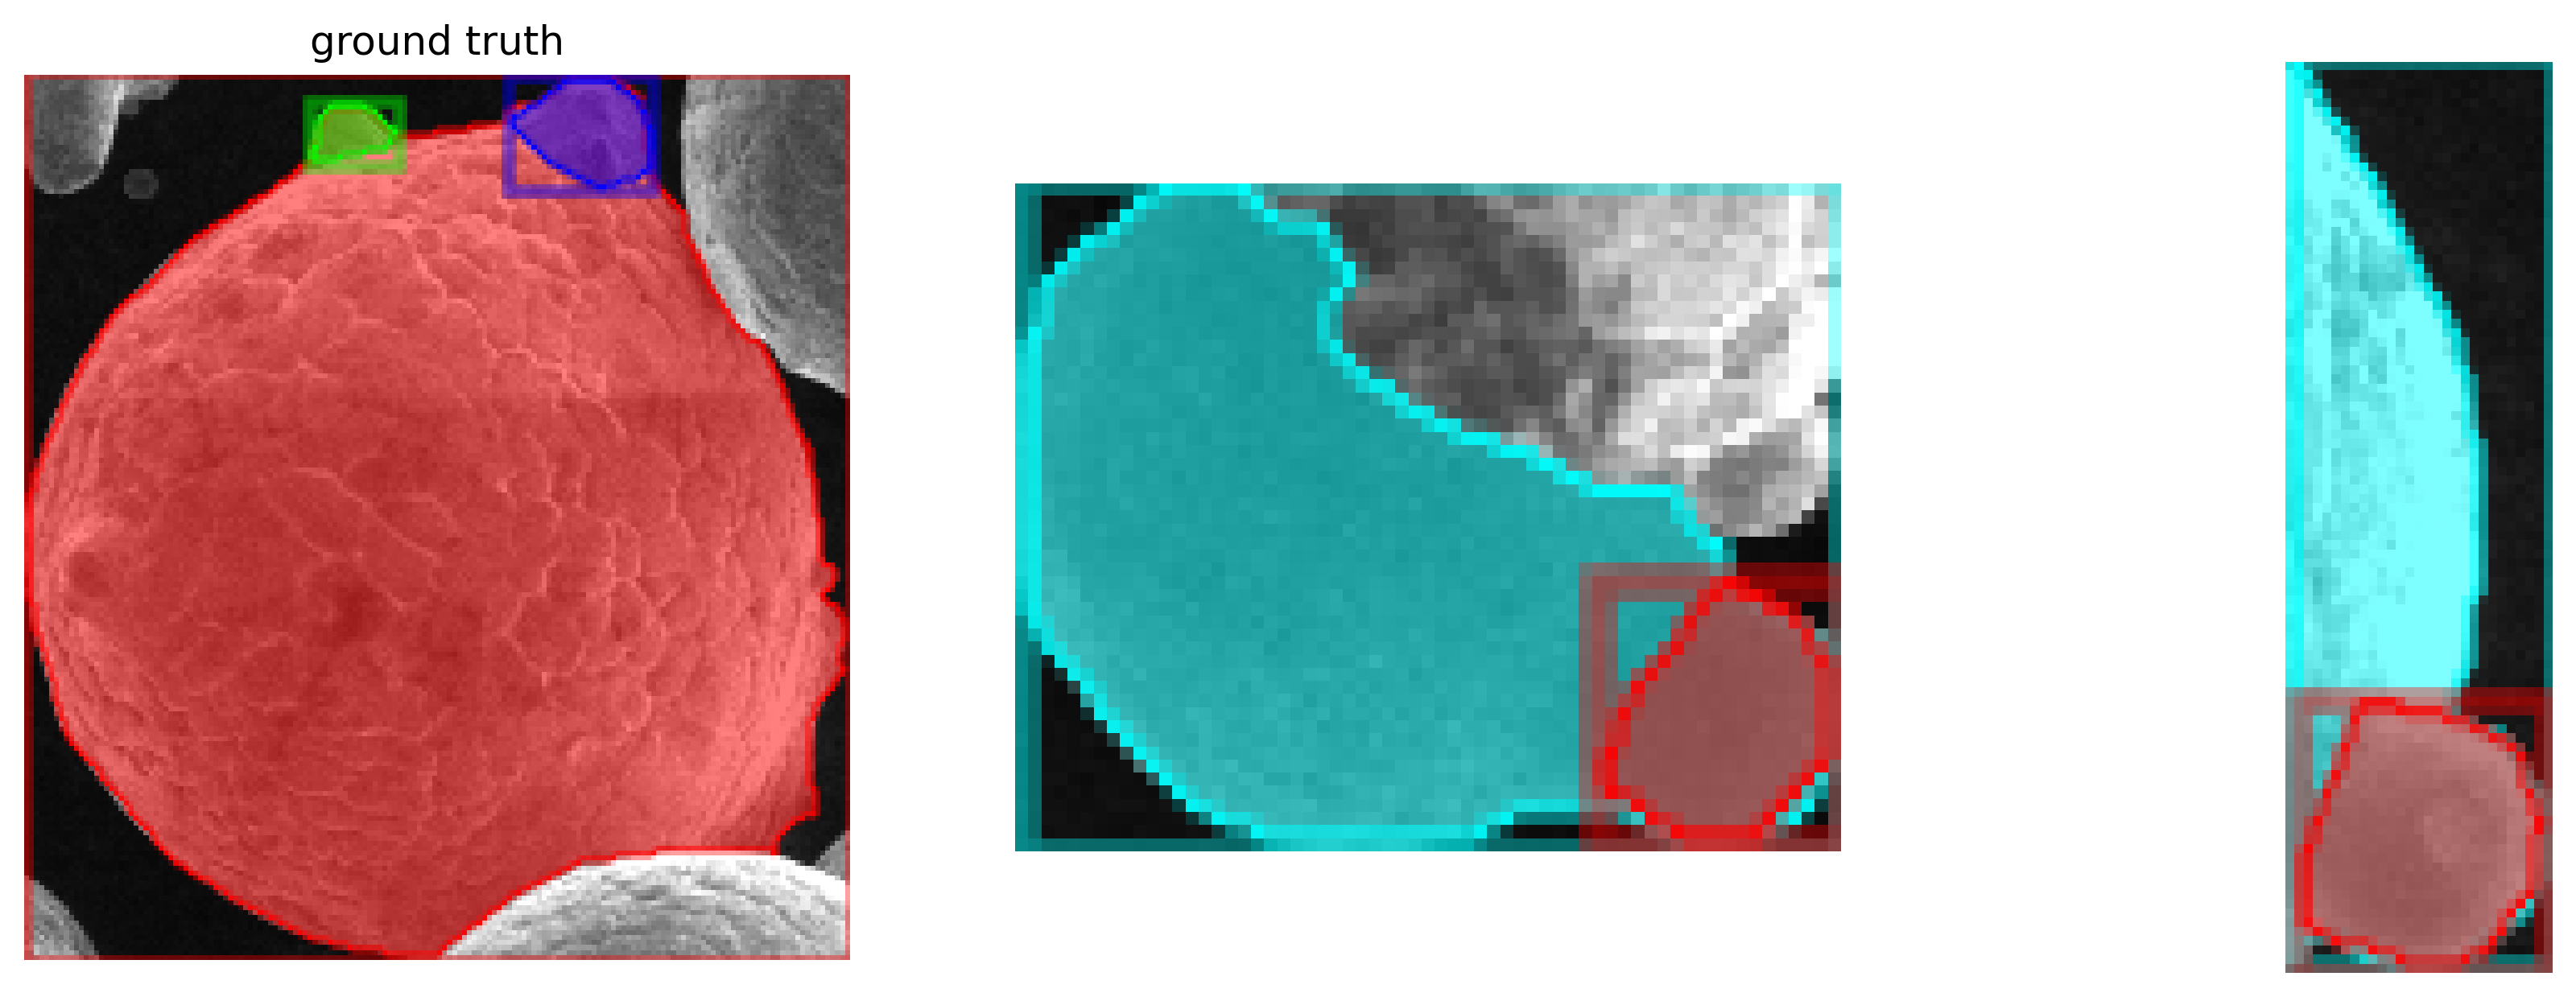

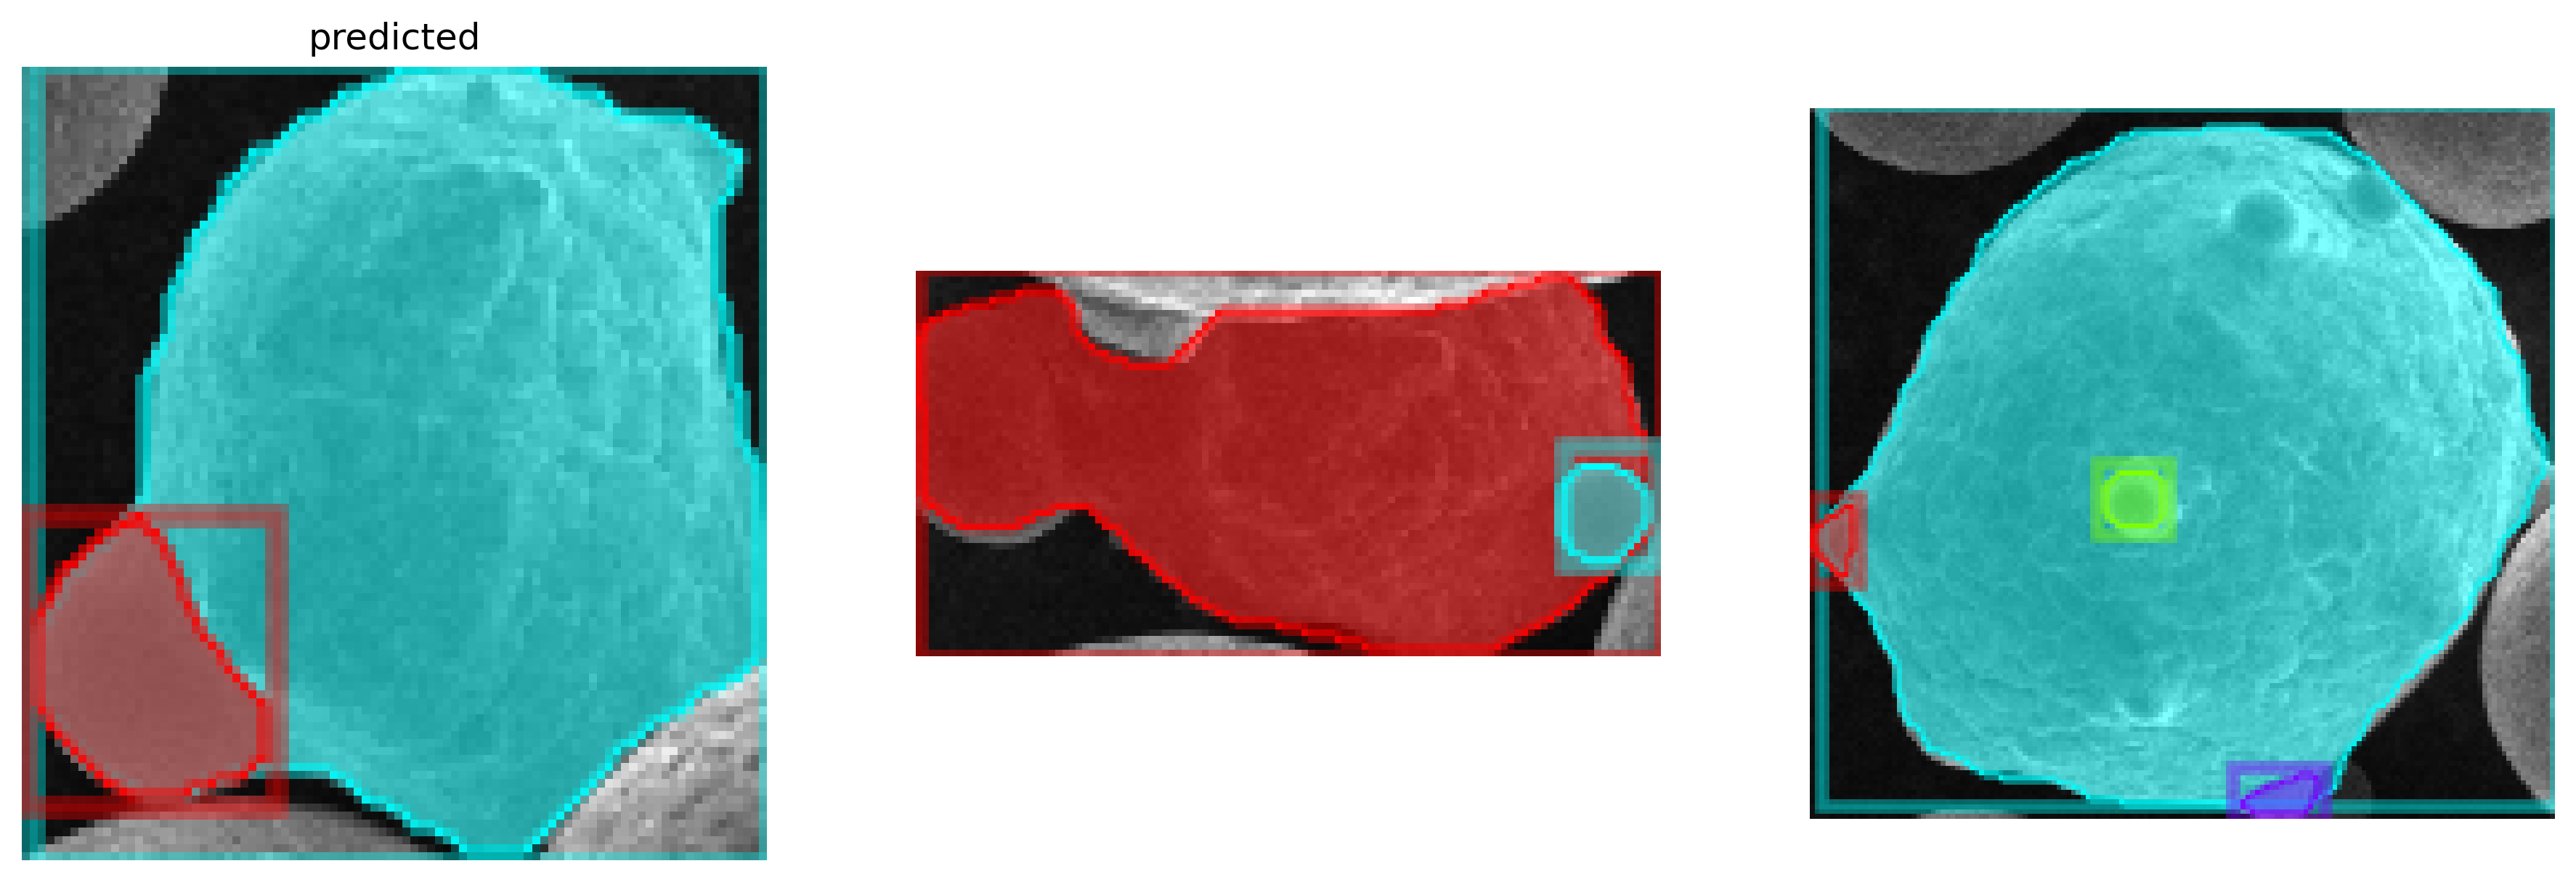

In [8]:
fig, ax = plt.subplots(1,3, figsize=(15,5), dpi=300)
for i, a in zip(np.random.choice(list(psi_gt.matches['match_pairs'].keys()), size=3, replace=False),
                 ax.ravel()):
    psi_gt.visualize_particle_with_satellites(i, a)
ax[0].set_title('ground truth')    
fig, ax = plt.subplots(1,3, figsize=(15,5), dpi=300)
for i, a in zip(np.random.choice(list(psi_pred.matches['match_pairs'].keys()), size=3, replace=False),
                 ax.ravel()):
    psi_pred.visualize_particle_with_satellites(i, a)
ax[0].set_title('predicted')

In [9]:
psi_gt.matches.keys()

dict_keys(['satellite_matches', 'satellites_unmatched', 'particles_unmatched', 'intersection_scores', 'match_pairs'])

In [10]:
gt_n = len(psi_gt.matches['match_pairs'])
pred_n = len(psi_pred.matches['match_pairs'])
print('Number of particles with satellites:\n\tgt: {}\n\tpred: {}\n\tratio: {:.3f}'.format(gt_n, pred_n, pred_n/gt_n))

Number of particles with satellites:
	gt: 48
	pred: 35
	ratio: 0.729
